# Dataset
Credit Card Customer Dataset   
Dataset can be found in: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### What is inside the dataset? 

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age:** Demographic variable - Customer's Age in Years
* **Gender:** Demographic variable - M=Male, F=Female
* **Dependent_count:** Demographic variable - Number of dependents
* **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category:** Demographic variable - Annual Income Category of the account holder (<40K, 40K-60K, 60K-80K, 80K-120K, >120K)

* **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

## Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Essential Libraries

Let us begin by importing the essential Python Libraries.


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Machine Learning
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Import GridSearch
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# LinearRegression
from sklearn.linear_model import LogisticRegression,LinearRegression
import statsmodels.api as sm

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Import Dataset

In [ ]:
o_data = pd.read_csv("BankChurners.csv", header=0)
data = o_data.copy().iloc[:,0:-2]
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [ ]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10127, 21)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

It would seem that there are `10127` rows and `21` columns. 
It seems that **none of the columns have NULL values**. 

## Clean the data
Convert values to numeric values. 

In [ ]:
obj_cols = data.columns[data.dtypes == 'object']
obj_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [ ]:
data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Map the classification in each column to numbers

In [ ]:
cleaned_data = data.copy()

cleaned_data['Attrition_Flag'] = cleaned_data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1}).astype(int)
cleaned_data['Gender'] = cleaned_data['Gender'].map({'F':0,'M':1}).astype(int)

for category in ['Unknown','High School', 'College','Graduate','Post-Graduate','Doctorate']:
    cleaned_data['Education_Level-' + category] = cleaned_data['Education_Level'].apply(lambda x: 1 if x == category else 0)

for category in ['Unknown','Married','Divorced']:
    cleaned_data['Marital_Status-' + category] = cleaned_data['Marital_Status'].apply(lambda x: 1 if x == category else 0)

cleaned_data['Income_Category-Unknown'] = cleaned_data['Income_Category'].apply(lambda x: 1 if x == "Unknown" else 0)
cleaned_data['Income_Category'] = cleaned_data['Income_Category'].map({'Unknown':0,
                                                                       'Less than $40K':1,
                                                                       '$40K - $60K':2,
                                                                       '$60K - $80K':3,
                                                                       '$80K - $120K':4,
                                                                       '$120K +':5}).astype(int)
    
for category in ['Silver',"Gold","Platinum"]:
    cleaned_data['Card_Category-' + category] = cleaned_data['Card_Category'].apply(lambda x: 1 if x == category else 0)

cleaned_data = cleaned_data.drop(labels=["Education_Level","Marital_Status","Card_Category"], axis=1)

In [ ]:
cleaned_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level-Graduate,Education_Level-Post-Graduate,Education_Level-Doctorate,Marital_Status-Unknown,Marital_Status-Married,Marital_Status-Divorced,Income_Category-Unknown,Card_Category-Silver,Card_Category-Gold,Card_Category-Platinum
0,768805383,0,45,1,3,3,39,5,1,3,...,0,0,0,0,1,0,0,0,0,0
1,818770008,0,49,0,5,1,44,6,1,2,...,1,0,0,0,0,0,0,0,0,0
2,713982108,0,51,1,3,4,36,4,1,0,...,1,0,0,0,1,0,0,0,0,0
3,769911858,0,40,0,4,1,34,3,4,1,...,0,0,0,1,0,0,0,0,0,0
4,709106358,0,40,1,3,3,21,5,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,2,40,3,2,3,...,1,0,0,0,0,0,0,0,0,0
10123,710638233,1,41,1,2,2,25,4,2,3,...,0,0,0,0,0,1,0,0,0,0
10124,716506083,1,44,0,1,1,36,5,3,4,...,0,0,0,0,1,0,0,0,0,0
10125,717406983,1,30,1,2,2,36,4,3,3,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
CLIENTNUM                        10127 non-null int64
Attrition_Flag                   10127 non-null int32
Customer_Age                     10127 non-null int64
Gender                           10127 non-null int32
Dependent_count                  10127 non-null int64
Income_Category                  10127 non-null int32
Months_on_book                   10127 non-null int64
Total_Relationship_Count         10127 non-null int64
Months_Inactive_12_mon           10127 non-null int64
Contacts_Count_12_mon            10127 non-null int64
Credit_Limit                     10127 non-null float64
Total_Revolving_Bal              10127 non-null int64
Avg_Open_To_Buy                  10127 non-null float64
Total_Amt_Chng_Q4_Q1             10127 non-null float64
Total_Trans_Amt                  10127 non-null int64
Total_Trans_Ct                   10127 non-null int64
Total_Ct_Chng_Q4_Q1  

(31.5, -0.5)

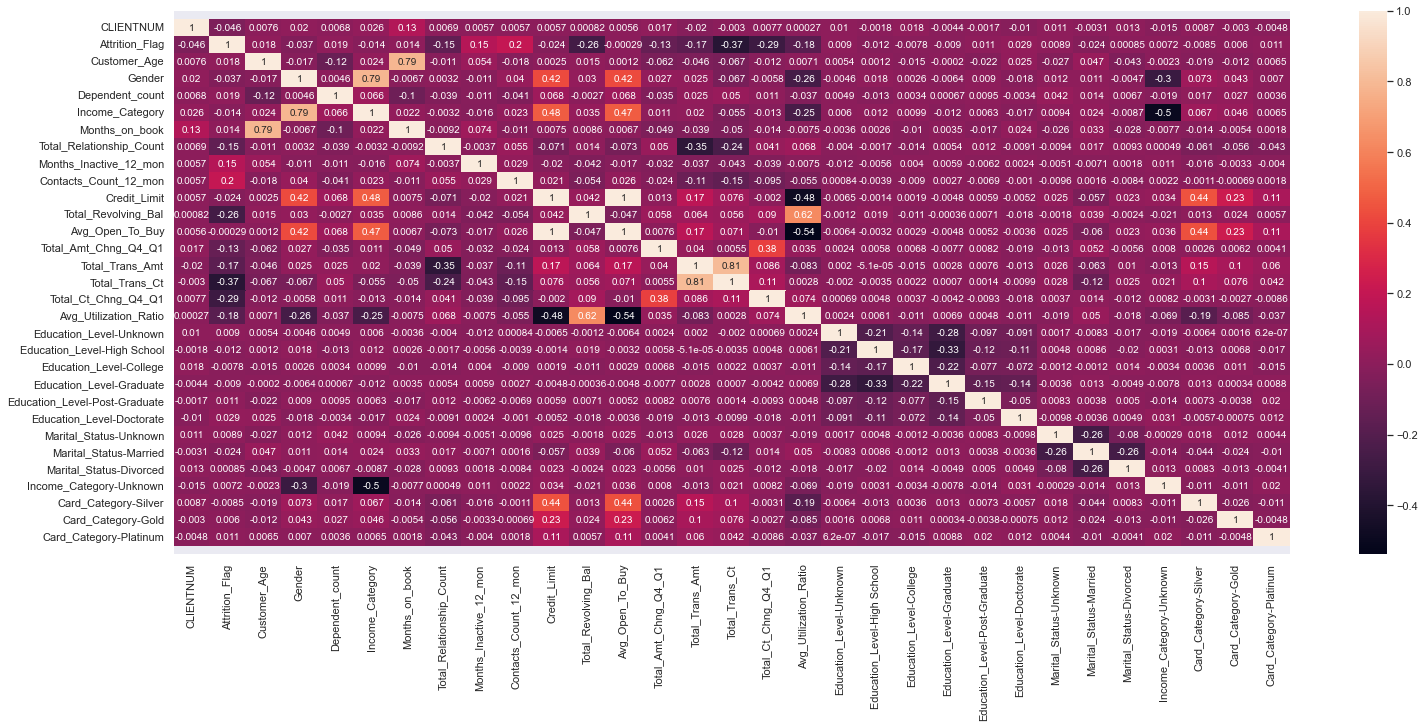

In [ ]:
# Calculating the correlation matrix
corr = cleaned_data.corr()
# Generating a heatmap
plt.figure(figsize=(25,10))
ax = sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True,)

#ensure that top and bottom rows aren't cut off
b, t = plt.ylim() # discover the values for bottom and top
plt.ylim(b + 0.5, t - 0.5)

# Decision Tree

### Train Test Split

In [ ]:
df_X = cleaned_data.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = cleaned_data.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [ ]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(10127, 28)
(10127,)
(7088, 28)
(7088,)
(3039, 28)
(3039,)


### Decision Tree

In [ ]:
# Create a Decision Tree Classifier object
dt1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dt1.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'Total_Trans_Ct <= 54.5\ngini = 0.271\nsamples = 7088\nvalue = [5944, 1144]\nclass = Existing Customers'),
 Text(0.25, 0.7, 'Total_Revolving_Bal <= 615.5\ngini = 0.473\nsamples = 2412\nvalue = [1488, 924]\nclass = Existing Customers'),
 Text(0.125, 0.5, 'Total_Ct_Chng_Q4_Q1 <= 0.646\ngini = 0.382\nsamples = 798\nvalue = [205, 593]\nclass = Attrited Customers'),
 Text(0.0625, 0.3, 'Months_Inactive_12_mon <= 1.5\ngini = 0.266\nsamples = 594\nvalue = [94, 500]\nclass = Attrited Customers'),
 Text(0.03125, 0.1, 'gini = 0.499\nsamples = 59\nvalue = [31, 28]\nclass = Existing Customers'),
 Text(0.09375, 0.1, 'gini = 0.208\nsamples = 535\nvalue = [63, 472]\nclass = Attrited Customers'),
 Text(0.1875, 0.3, 'Total_Relationship_Count <= 2.5\ngini = 0.496\nsamples = 204\nvalue = [111, 93]\nclass = Existing Customers'),
 Text(0.15625, 0.1, 'gini = 0.049\nsamples = 40\nvalue = [1, 39]\nclass = Attrited Customers'),
 Text(0.21875, 0.1, 'gini = 0.442\nsamples = 164\nvalue = [110, 54]\

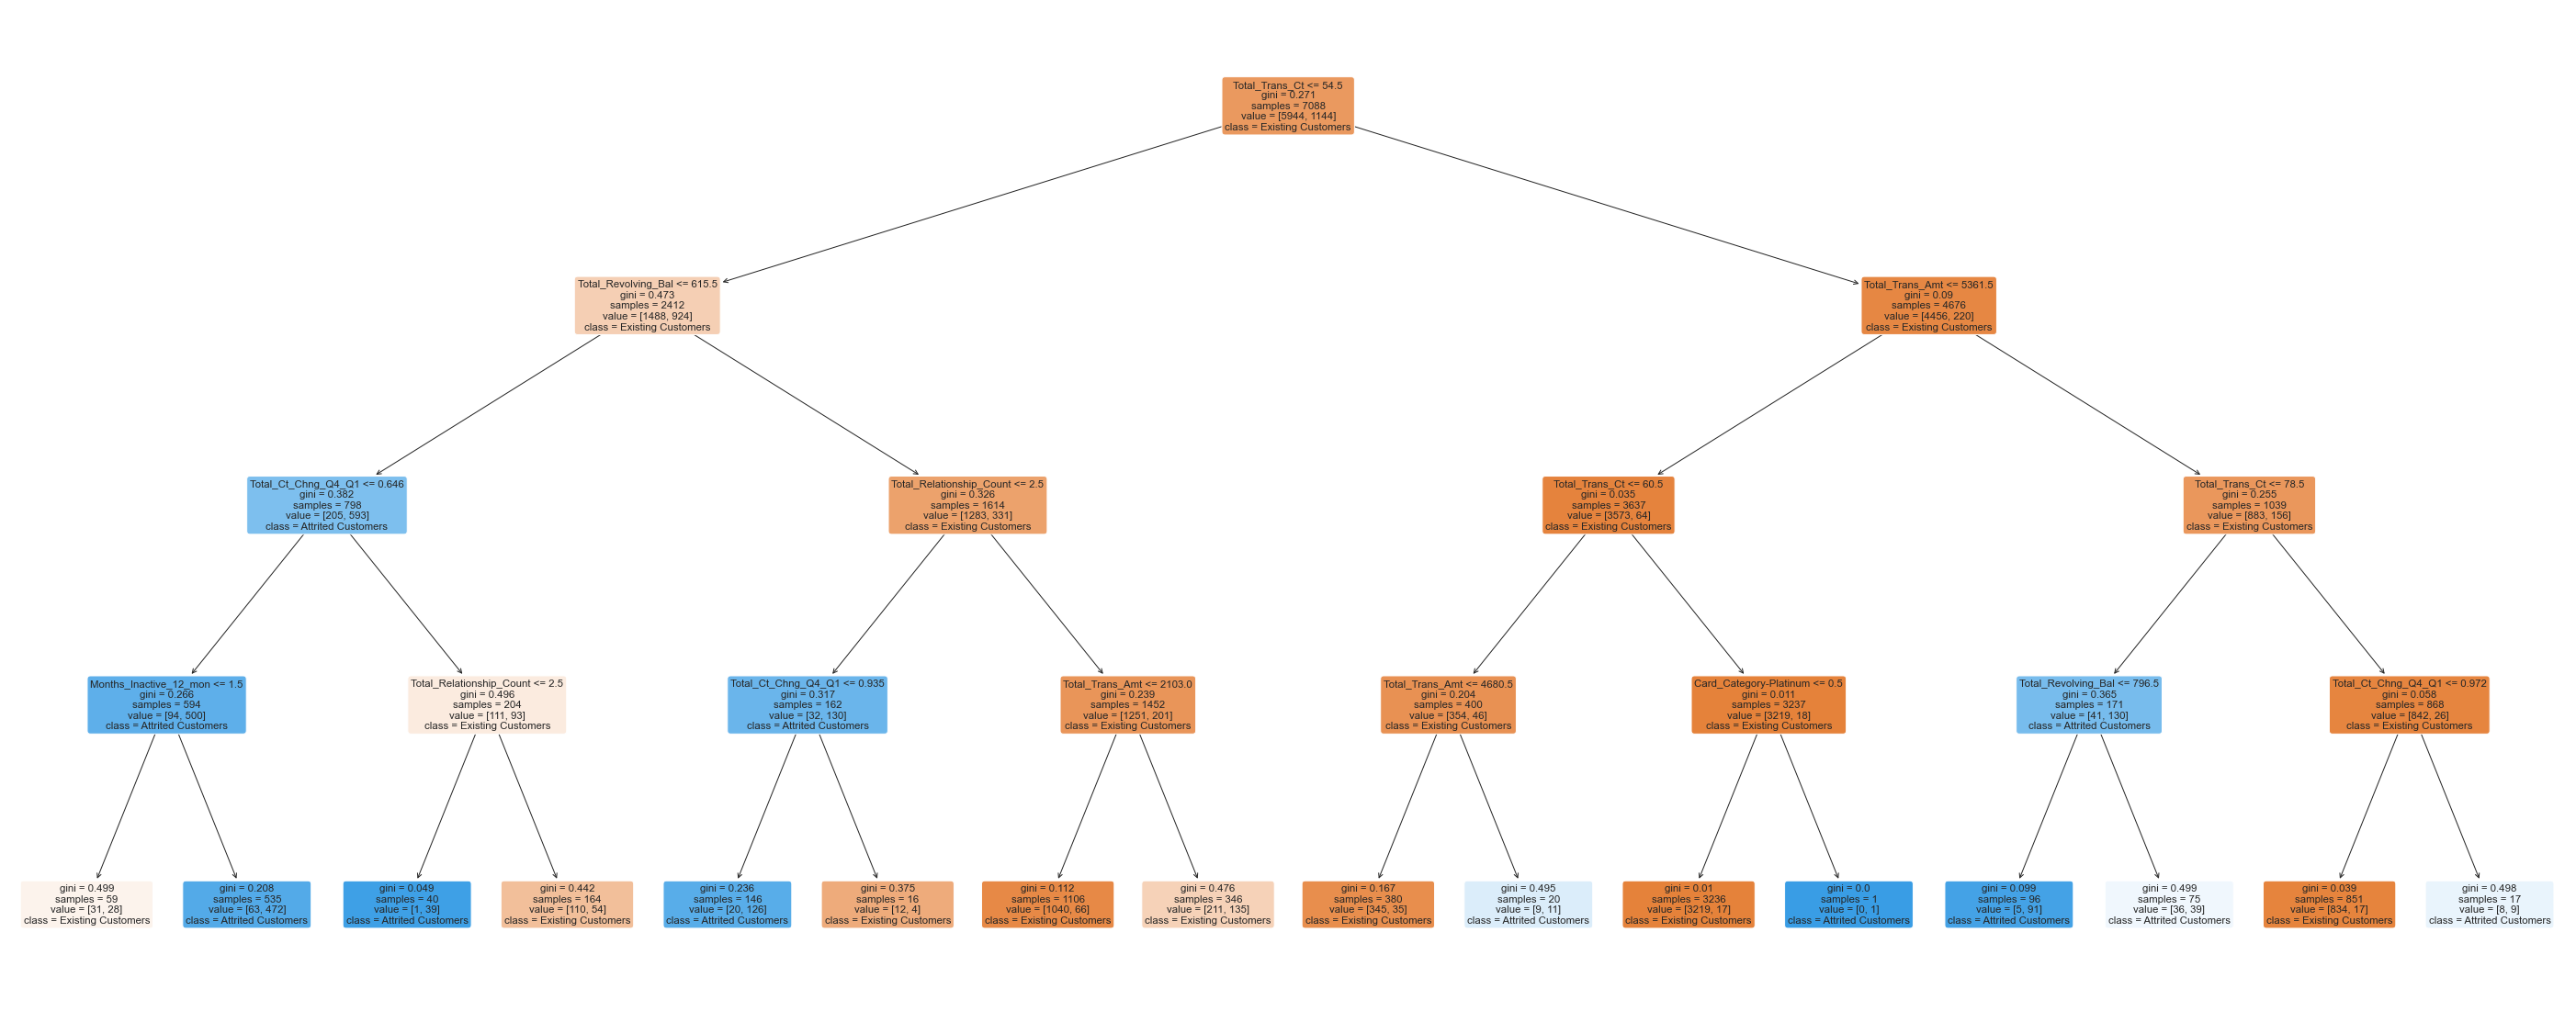

In [ ]:
#plot decision tree
f1 = plt.figure(figsize=(50,20))
plot_tree(dt1, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Thus, the significant variables are 
1. Total_Trans_Ct
2. Total_Revolving_Bal
3. Total_Ct_Chng_Q4_Q1
4. Total_Relationship_Count
5. Months_Inactive_12_mon
6. Total_Trans_Amt
7. Card_Category- Platinum

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9297404063205418

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9174070417900625

                   precision    recall  f1-score   support

Existing Customer       0.93      0.97      0.95      2556
Attrited Customer       0.81      0.62      0.71       483

         accuracy                           0.92      3039
        macro avg       0.87      0.80      0.83      3039
     weighted avg       0.91      0.92      0.91      3039



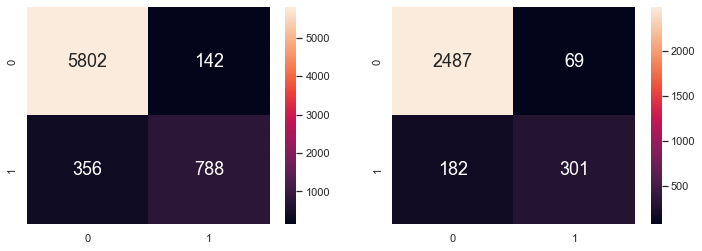

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt1.predict(X_train)
y_test_pred = dt1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt1.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

dt = DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"],  
              'max_depth' : [2,3,4,5,6,7,8,9,10,11,12]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

best_param = gs.best_params_


0.9454031300550627
{'criterion': 'gini', 'max_depth': 7}


In [ ]:
dt2 = DecisionTreeClassifier(criterion = best_param['criterion'], 
                             max_depth = best_param['max_depth'])
#fitting the parameters into the Decision Tree
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

[Text(0.5385, 0.9375, 'Total_Trans_Ct <= 54.5\ngini = 0.271\nsamples = 7088\nvalue = [5944, 1144]\nclass = Existing Customers'),
 Text(0.286, 0.8125, 'Total_Revolving_Bal <= 615.5\ngini = 0.473\nsamples = 2412\nvalue = [1488, 924]\nclass = Existing Customers'),
 Text(0.158, 0.6875, 'Total_Ct_Chng_Q4_Q1 <= 0.646\ngini = 0.382\nsamples = 798\nvalue = [205, 593]\nclass = Attrited Customers'),
 Text(0.1, 0.5625, 'Months_Inactive_12_mon <= 1.5\ngini = 0.266\nsamples = 594\nvalue = [94, 500]\nclass = Attrited Customers'),
 Text(0.052, 0.4375, 'Total_Trans_Amt <= 2088.5\ngini = 0.499\nsamples = 59\nvalue = [31, 28]\nclass = Existing Customers'),
 Text(0.032, 0.3125, 'Total_Trans_Amt <= 1062.5\ngini = 0.444\nsamples = 42\nvalue = [28, 14]\nclass = Existing Customers'),
 Text(0.016, 0.1875, 'Credit_Limit <= 2508.15\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Attrited Customers'),
 Text(0.008, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Existing Customers'),
 Text(0.024, 0.

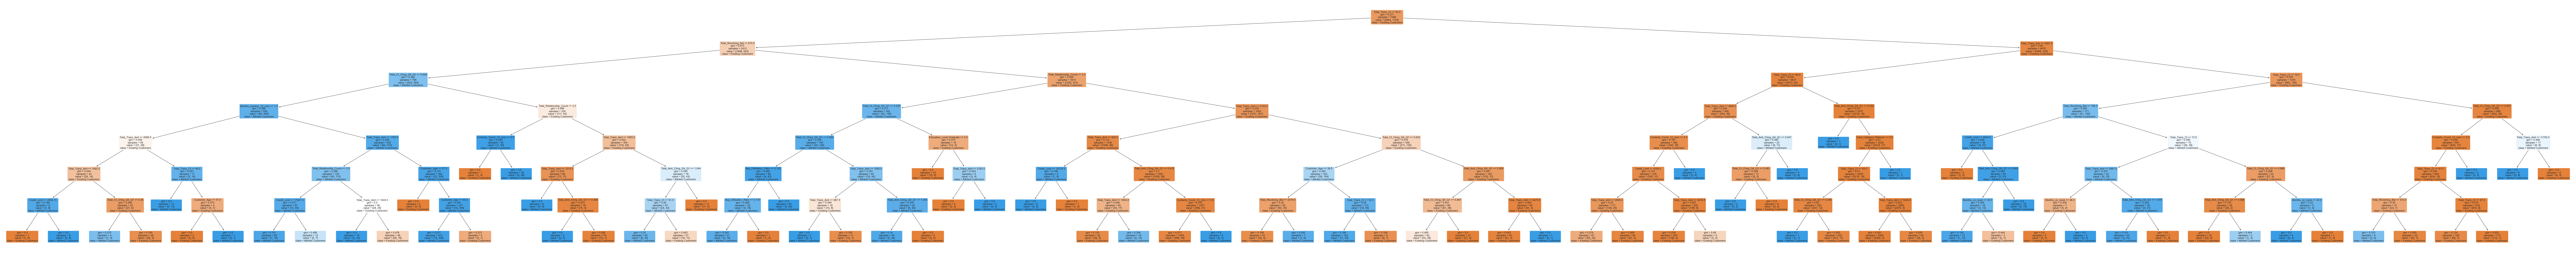

In [ ]:
#plot decision tree
f2 = plt.figure(figsize=(200,20))
plot_tree(dt2, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.967127539503386

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9443896018427114

                   precision    recall  f1-score   support

Existing Customer       0.96      0.97      0.97      2556
Attrited Customer       0.85      0.80      0.82       483

         accuracy                           0.94      3039
        macro avg       0.90      0.88      0.89      3039
     weighted avg       0.94      0.94      0.94      3039



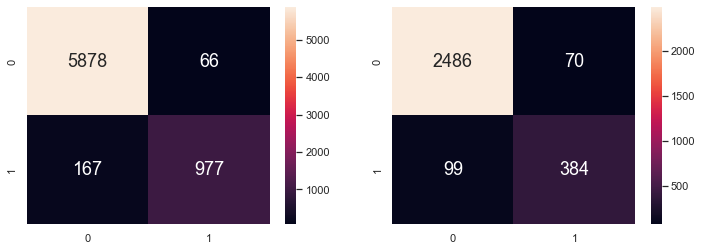

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt2.predict(X_train)
y_test_pred = dt2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))